In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
train_data = pd.read_csv('/kaggle/input/titands/Titanic.csv')

# Показать первые несколько строк данных
print(train_data.head())

# Проверка наличия пропусков в данных
print(train_data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

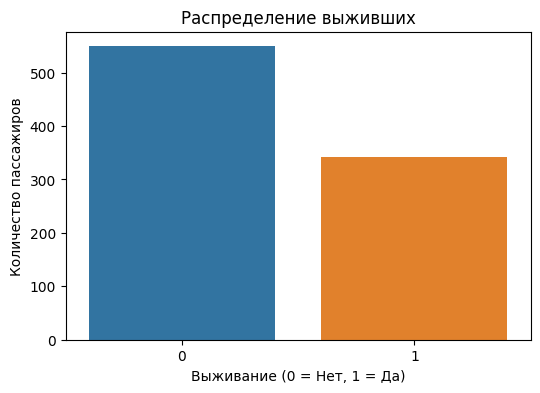

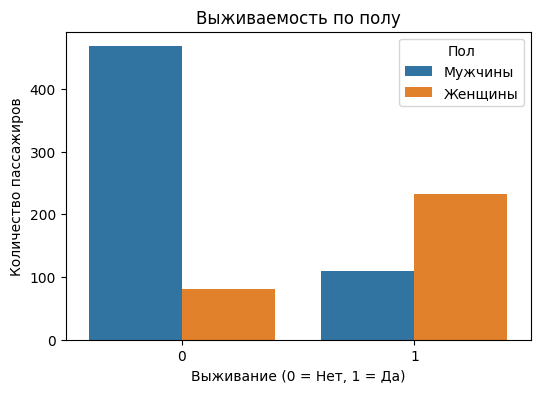

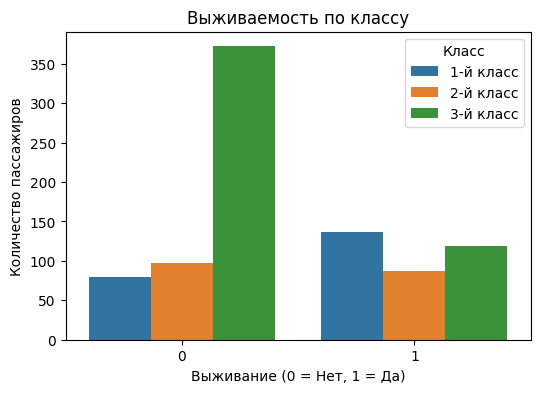

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


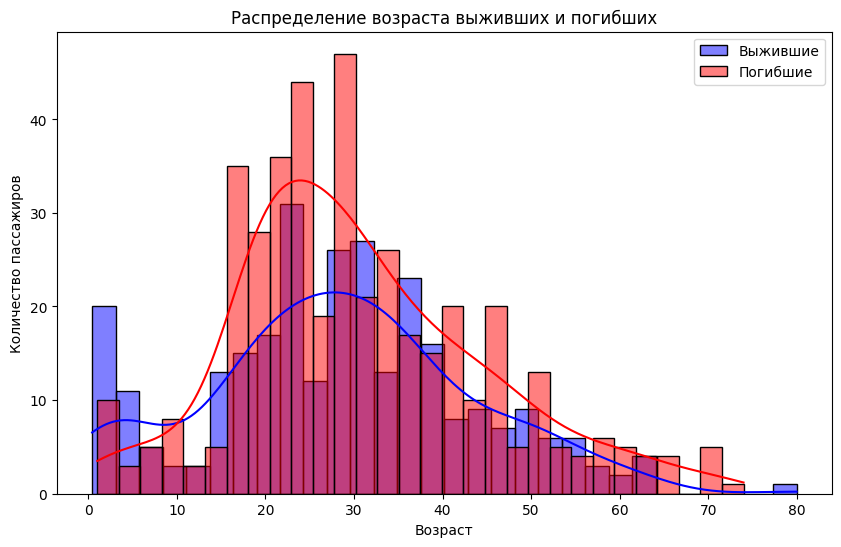

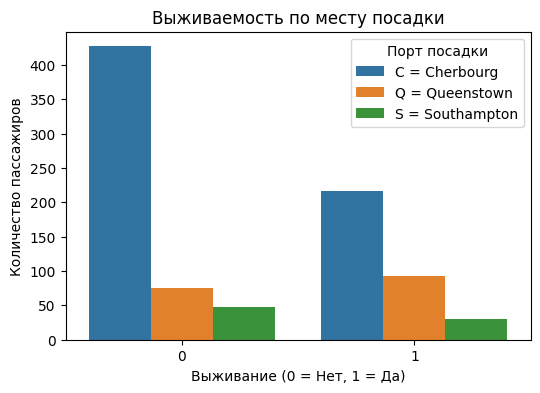

In [2]:
# 1. Распределение выживших
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_data)
plt.title('Распределение выживших')
plt.xlabel('Выживание (0 = Нет, 1 = Да)')
plt.ylabel('Количество пассажиров')
plt.show()

# 2. Выживаемость по полу
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Выживаемость по полу')
plt.xlabel('Выживание (0 = Нет, 1 = Да)')
plt.ylabel('Количество пассажиров')
plt.legend(title='Пол', labels=['Мужчины', 'Женщины'])
plt.show()

# 3. Выживаемость по классу (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Выживаемость по классу')
plt.xlabel('Выживание (0 = Нет, 1 = Да)')
plt.ylabel('Количество пассажиров')
plt.legend(title='Класс', labels=['1-й класс', '2-й класс', '3-й класс'])
plt.show()

# 4. Выживаемость по возрасту
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data[train_data['Survived'] == 1], x='Age', bins=30, color='blue', label='Выжившие', kde=True)
sns.histplot(data=train_data[train_data['Survived'] == 0], x='Age', bins=30, color='red', label='Погибшие', kde=True)
plt.title('Распределение возраста выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

# 5. Выживаемость по месту посадки (Embarked)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Embarked', data=train_data)
plt.title('Выживаемость по месту посадки')
plt.xlabel('Выживание (0 = Нет, 1 = Да)')
plt.ylabel('Количество пассажиров')
plt.legend(title='Порт посадки', labels=['C = Cherbourg', 'Q = Queenstown', 'S = Southampton'])
plt.show()


1. Пол: Женщины выживали значительно чаще, чем мужчины.

2. Класс: Пассажиры первого класса выживали чаще, чем пассажиры второго и третьего классов.

3. Возраст: Молодые люди имели больший шанс на выживание.

4. Место посадки: Разные порты посадки также влияли на шансы на выживание.

In [3]:
# Создание новых признаков
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)

# Категоризация возраста
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data['Age'].fillna(-1), bins=bins, labels=labels)

# Преобразование категориальных признаков в числовые
train_data['AgeGroup'] = train_data['AgeGroup'].cat.codes

# Проверка новых признаков
print(train_data[['FamilySize', 'IsAlone', 'AgeGroup']].head())


   FamilySize  IsAlone  AgeGroup
0           2        0         2
1           2        0         3
2           1        1         2
3           2        0         2
4           1        1         2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Подготовка данных для модели
X = train_data[['Pclass', 'Sex', 'AgeGroup', 'FamilySize', 'IsAlone']]
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
y = train_data['Survived']

# Разделение данных на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)

# Предсказание на валидационной выборке
y_pred = log_reg_model.predict(X_val)

# Оценка модели
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[91 14]
 [23 51]]


/tmp/ipykernel_24/1232564626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


In [5]:
from sklearn.model_selection import StratifiedKFold

# Инициализация кросс-валидации
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X, y):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]
    
    # Обучение модели на текущем фолде
    log_reg_model.fit(X_train_cv, y_train_cv)
    
    # Предсказание на валидационной выборке
    y_pred_cv = log_reg_model.predict(X_val_cv)
    
    # Оценка модели для текущего фолда
    print(classification_report(y_val_cv, y_pred_cv))
    print(confusion_matrix(y_val_cv, y_pred_cv))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       183
           1       0.77      0.69      0.73       114

    accuracy                           0.80       297
   macro avg       0.79      0.78      0.79       297
weighted avg       0.80      0.80      0.80       297

[[159  24]
 [ 35  79]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       183
           1       0.75      0.64      0.69       114

    accuracy                           0.78       297
   macro avg       0.77      0.75      0.76       297
weighted avg       0.78      0.78      0.78       297

[[159  24]
 [ 41  73]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       183
           1       0.75      0.74      0.74       114

    accuracy                           0.80       297
   macro avg       0.79      0.79      0.79       297
weighted avg       0.80     

In [6]:
# Получение матрицы ошибок
conf_matrix = confusion_matrix(y_val, y_pred)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')


TP: 51, TN: 91, FP: 14, FN: 23
